# Workout 1

William Black

## To Run

Suppose the project directory is ~/my/proj/.

1. Type conda ```env create -f ~/my/proj/environment.yml``` into the terminal to create the Conda environment for these worksheets.

1. Type ```conda env activate m228-workouts``` into terminal to activate the Conda environment from the previous step.

1. Enter ```conda develop ~/my/proj/``` into terminal. This will allow Conda to see your project by adding it to the Python Path.

1. from IPython import display
from importlib_resources import filesRestart the current Python kernel and reopen this Jupyter Notebook with the virtual environment from step 2 activated.

In [1]:
from IPython import display
from importlib_resources import files
from m228_workouts.psets import solution_3, solution_4

## Problem 1

## Problem 2

## Problem 3

Below is the marginal distribution for the SPX closing price data for the most recent 2 years. Also plotted are a Gaussian kernel density estimate as well as a normal Gaussian function with empirical mean and variance coming from the data. The code used to download and plot is also included.

[*********************100%***********************]  1 of 1 completed


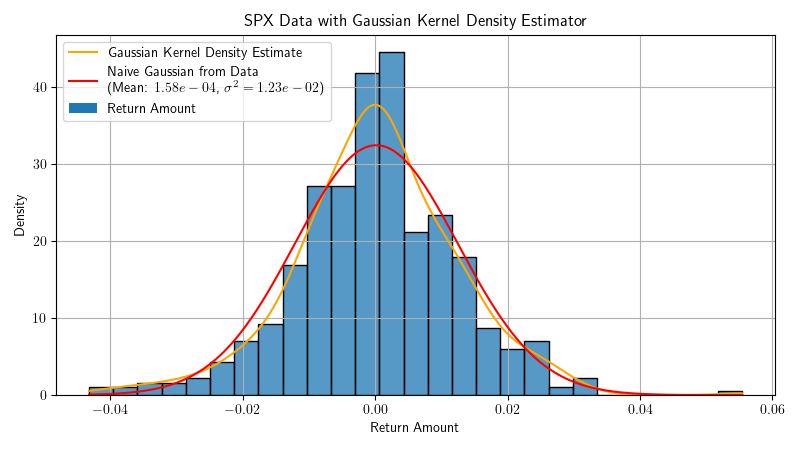

In [7]:
solution_3(period='2y')
display.Image(files("m228_workouts.plots").joinpath("SPX_Histogram.png"))

In [3]:
display.Code(files("m228_workouts.psets").joinpath("problem_3.py"))

import yfinance as yf
from seaborn import histplot
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
from importlib_resources import files
from numpy import linspace


def solution_3(period="2y", show_plt=False, save_plt=True, fname=None):
    plt.rcParams["text.usetex"] = True
    plt.figure(figsize=(8, 4.5))
    price_df = yf.download(
        "^GSPC",
        period=period,
        interval="1d",
    )[["Close"]]

    R = price_df.pct_change().dropna()

    def kde(x):
        return gaussian_kde(R.values.T).pdf(x.T)

    def pdf(x):
        return norm.pdf(
            x,
            loc=R.mean(),
            scale=R.std(),
        )

    X_plot = linspace(R.min(), R.max(), 500)

    plt.plot(
        X_plot,
        kde(X_plot),
        c="orange",
    )
    plt.plot(
        X_plot,
        pdf(X_plot),
        c="r",
    )
    histplot(
        data=R,
        stat="density",
        x="Close",
    )

    plt.grid()

    plt.title("SPX Data with Gaussian Kernel Density Estimator")

    plt.xlabel("Return Amount")
    plt.ylabel("Density")

    plt.legend(
        [
            f"Gaussian Kernel Density Estimate",
            f"Naive Gaussian from Data\n (Mean: ${float(R.mean()):.2e}$, $\\sigma^2 = {float(R.std()):.2e}$)",
            f"Return Amount",
        ],
        loc="upper left",
    )

    plt.tight_layout()

    if save_plt:
        if fname is None:
            fname = "SPX_Histogram.png"
        plt.savefig(files("m228_workouts.plots").joinpath(fname))
    if show_plt:
        plt.show()

    plt.close()

## Problem 4

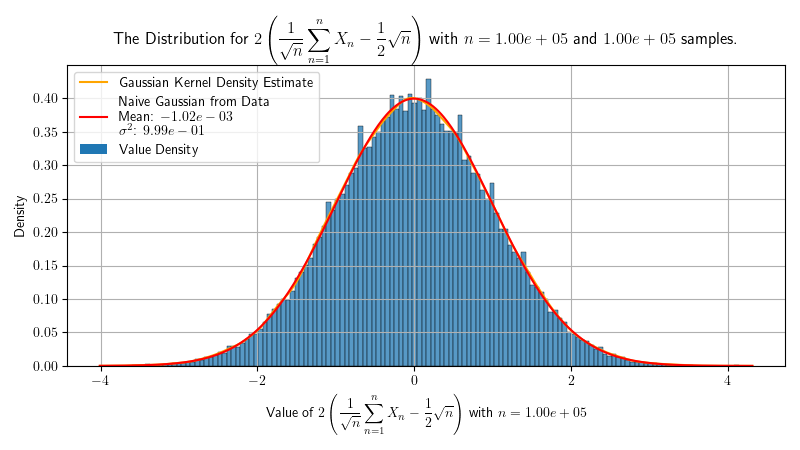

In [10]:
solution_4(N_sim=10**5, N_sum=10**10)
display.Image(files("m228_workouts.plots").joinpath("CLT.png"))

In [5]:
display.Code(files("m228_workouts.psets").joinpath("problem_4.py"))

from seaborn import histplot
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm, bernoulli, binom
from importlib_resources import files
import numpy as np


def solution_4(N_sim=10**4, N_sum=10**4, show_plt=False, save_plt=True, fname=None):
    plt.rcParams["text.usetex"] = True
    plt.figure(figsize=(8, 4.5))

    # bern = bernoulli(p=0.5)

    if True:
        data = (
            binom.rvs(
                size=N_sim,
                n=N_sum,
                p=0.5,
            )
            / np.sqrt(N_sum)
            - 0.5 * np.sqrt(N_sum)
        ) / 0.5
        # Binomial random variable is the sum of i.i.d. Bernoulli random variables
    else:
        data = (
            np.sum(
                bernoulli.rvs(p=0.5, size=(N_sim, N_sum)),
                axis=1,
            )
            / np.sqrt(N_sum)
            - 0.5 * np.sqrt(N_sum)
        ) / 0.5

    def kde(x):
        return gaussian_kde(data).pdf(x.T)

    def pdf(x):
        return norm.pdf(
            x,
            loc=np.mean(data),
            scale=np.std(data),
        )

    X_plot = np.linspace(data.min(), data.max(), 500)

    plt.plot(
        X_plot,
        kde(X_plot),
        c="orange",
    )
    plt.plot(
        X_plot,
        pdf(X_plot),
        c="r",
    )
    histplot(
        data=data,
        stat="density",
        # x="Close",
    )

    plt.grid()

    plt.title(
        "The Distribution for "
        r"$\displaystyle{"
        + r"2 \left ("
        + r"\frac{1}{\sqrt{"
        + f"n"
        + r"}}"
        + r"\sum_{n = 1}^{"
        + f"n"
        + r"}"
        + r"X_n"
        + r"- \frac{1}{2} \sqrt{n}"
        + r"\right )"
        + r"}$"
        + r" with $n = "
        + f"{N_sum:.2e}"
        + r"$ "
        + r"and $"
        + f"{N_sim:.2e}"
        + r"$ samples."
    )

    plt.xlabel(
        "Value of "
        + r"$\displaystyle{"
        + r"2 \left ("
        + r"\frac{1}{\sqrt{"
        + f"n"
        + r"}}"
        + r"\sum_{n = 1}^{"
        + f"n"
        + r"}"
        + r"X_n"
        + r"- \frac{1}{2} \sqrt{n}"
        + r"\right )"
        + r"}$"
        + r" with $n = "
        + f"{N_sum:.2e}"
        + r"$"
    )
    plt.ylabel("Density")

    plt.legend(
        [
            f"Gaussian Kernel Density Estimate",
            f"Naive Gaussian from Data\n Mean: ${float(np.mean(data)):.2e}$\n $\\sigma^2$: ${float(np.std(data)):.2e}$",
            f"Value Density",
        ],
        loc="upper left",
    )

    plt.tight_layout()

    if save_plt:
        if fname is None:
            fname = "CLT.png"
        plt.savefig(files("m228_workouts.plots").joinpath(fname))
    if show_plt:
        plt.show()

    plt.close()


if __name__ == "__main__":
    solution_4(N_sim=10**3, N_sum=10**10, save_plt=True, show_plt=True)

## Problem 5